In [3]:
import pandas as pd

df = pd.read_csv(
    r'C:/temp/auswertung/auswertung.csv', 
    names=["Zeit", "Rolle", "Antworten"], 
    sep=",", 
    header=0)
df.head()

,Zeit,Rolle,Antworten
0,2017/10/07 12:14:03 PM GMT+2,Software-Entwickler/-Architekt,"Fehlendes, unklares, unterschiedliches Qualitä..."
1,2017/10/07 1:38:55 PM GMT+2,Software-Entwickler/-Architekt,"Fehlendes, unklares, unterschiedliches Qualitä..."
2,2017/10/07 1:56:37 PM GMT+2,Software-Entwickler/-Architekt,"Management-Druck (Überstunden, schneller entwi..."
3,2017/10/07 2:01:44 PM GMT+2,Operator/Betrieb,Mangelndes Verständnis für Softwareentwicklung...
4,2017/10/07 2:04:00 PM GMT+2,Software-Entwickler/-Architekt,Geringe oder fehlende Testabdeckung;Politische...


# Teilnehmerzahl

In [4]:
teilnehmerzahl = len(df)
teilnehmerzahl

30

# Rollenverteilung

In [5]:
pd.DataFrame(df['Rolle'].value_counts())

,Rolle
Software-Entwickler/-Architekt,16
Operator/Betrieb,5
Produktmanager,3
Meister der Faulheit und Inkompetenz,1
Partner Manager,1
Projektleiter/-manager,1
Sonstige,1
Gesamtentwicklungsleiter,1
Anforderungsmanager,1


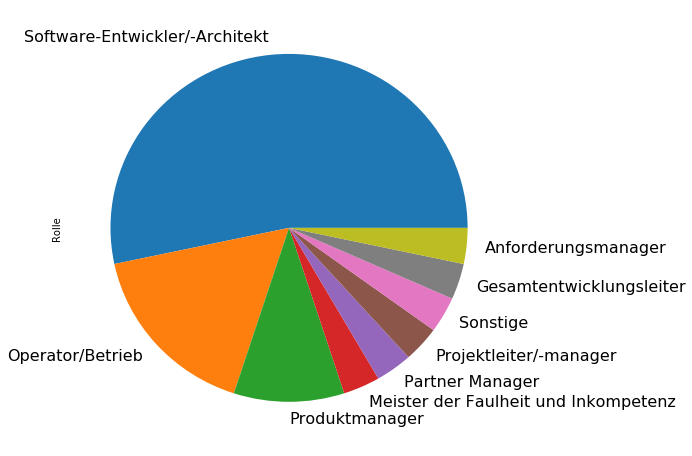

In [6]:
%matplotlib inline
df['Rolle'].value_counts().plot(kind="pie", figsize=(8,8), fontsize=16)

# Auswertung Fragen

In [7]:
df['Antworten'] = df['Antworten'].str.replace("Entwicklungsprozess;", "Entwicklungsprozess,")
antworten = df['Antworten'].str.split(";", expand=True).unstack().reset_index()
# Hack für vorhandenen Semikolon :-/
antworten[0] = antworten[0].str.replace("Entwicklungsprozess,", "Entwicklungsprozess;")
antworten = antworten[[0]]
antworten['count'] = 1
prozentualer_anteil = antworten.groupby(0).count()
prozentualer_anteil["Wir"] = prozentualer_anteil['count'] / teilnehmerzahl
prozentualer_anteil.head(10)

,count,Wir
0,,
"Fehlendes, unklares, unterschiedliches Qualitätsbewusstsein",9,0.300000
Geringe oder fehlende Testabdeckung,9,0.300000
Kein oder schwacher Entwicklungsprozess; mangelnde Prozesstreue der Mitarbeiter,6,0.200000
Kunden die zu lange brauchen um Features freizugeben.,1,0.033333
"Management-Druck (Überstunden, schneller entwickeln!)",4,0.133333
Mangelnde Fortbildungsmöglichkeiten,4,0.133333
Mangelnde Rollenklärung / Rollenverständnis,3,0.100000
Mangelndes Verständnis für Softwareentwicklung im Management,9,0.300000
Menschliche Schwächen von Teammitgliedern (mich eingeschlossen),8,0.266667


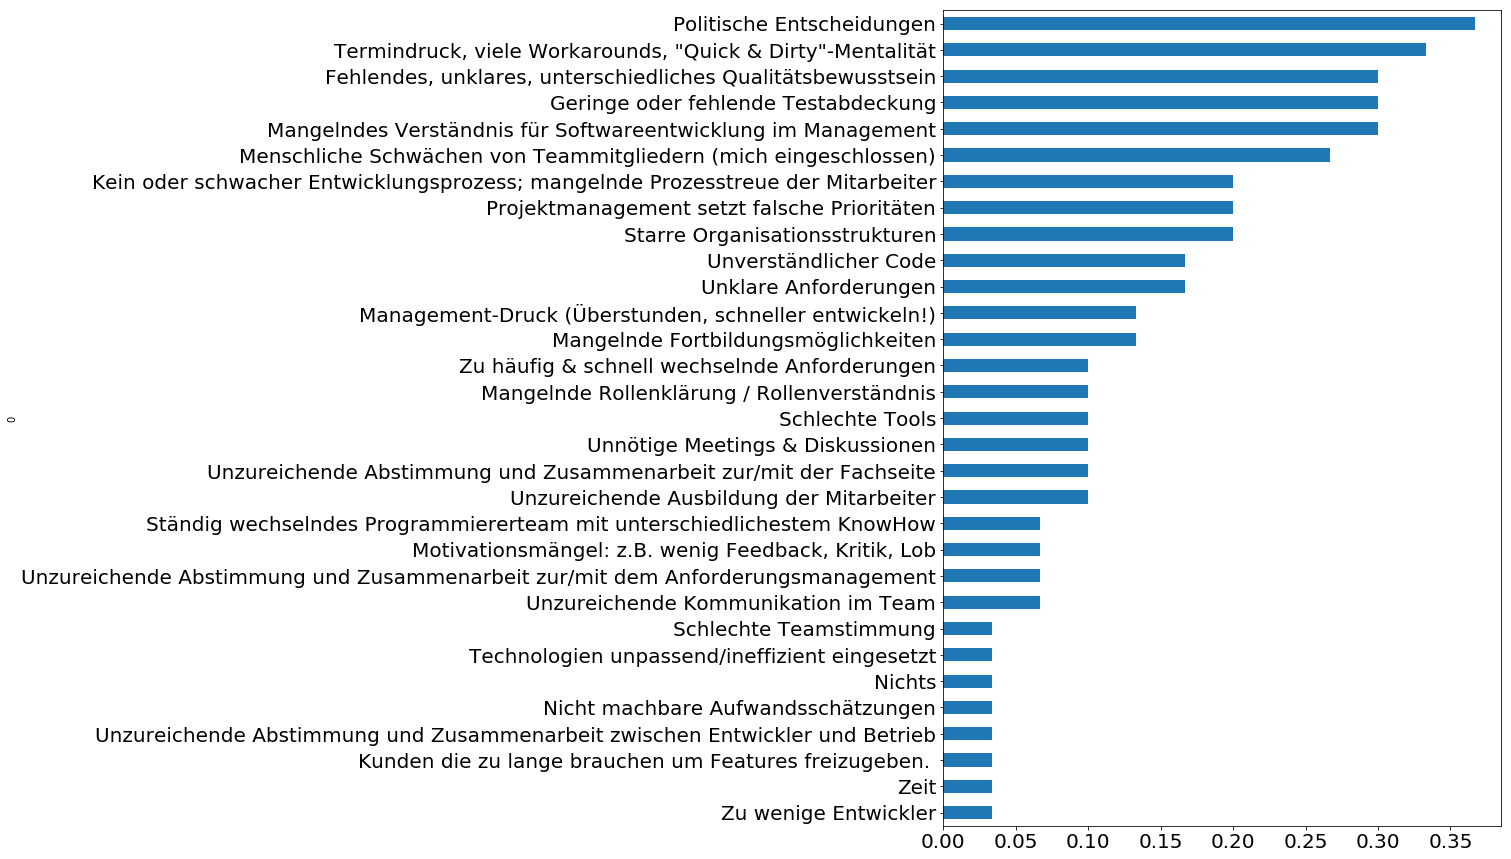

In [8]:
prozentualer_anteil['Wir'].sort_values().plot(kind='barh', figsize=(10,15), fontsize=20)

In [9]:
vergleichsauswertung = pd.read_csv(
    r"C:/Temp/auswertung/andere.csv", 
    sep="|", 
    index_col=0, 
    names=["Frage", "Andere"], 
    header=0)
vergleichsauswertung.head(10)

,Andere
Frage,
Unklare Anforderungen,53.49
"Termindruck, viele Workarounds, ""Quick & Dirty""-Mentalität",37.21
"Fehlendes, unklares, unterschiedliches Qualitätsbewusstsein",37.21
Geringe oder fehlende Testabdeckung,34.88
Zu häufig & schnell wechselnde Anforderungen,25.58
Mangelndes Verständnis für Softwareentwicklung im Management,25.58
Politische Entscheidungen,20.93
Nicht machbare Aufwandsschätzungen,18.60
Projektmanagement setzt falsche Prioritäten,18.60


In [10]:
ergebnis_raw = prozentualer_anteil.join(vergleichsauswertung, how="outer").sort_values(by="Wir", ascending=False).fillna(0)
del(ergebnis_raw['count'])
ergebnis_raw['Wir'] = ergebnis_raw['Wir'] * 100
ergebnis = ergebnis_raw.copy()
ergebnis['Wir'] = ergebnis['Wir'].apply(lambda x : '{:,.2f} %'.format(x))
ergebnis['Andere'] = ergebnis['Andere'].apply(lambda x : '{:,.2f} %'.format(x))
ergebnis

,Wir,Andere
Politische Entscheidungen,36.67 %,20.93 %
"Termindruck, viele Workarounds, ""Quick & Dirty""-Mentalität",33.33 %,37.21 %
"Fehlendes, unklares, unterschiedliches Qualitätsbewusstsein",30.00 %,37.21 %
Mangelndes Verständnis für Softwareentwicklung im Management,30.00 %,25.58 %
Geringe oder fehlende Testabdeckung,30.00 %,34.88 %
Menschliche Schwächen von Teammitgliedern (mich eingeschlossen),26.67 %,13.95 %
Projektmanagement setzt falsche Prioritäten,20.00 %,18.60 %
Kein oder schwacher Entwicklungsprozess; mangelnde Prozesstreue der Mitarbeiter,20.00 %,13.95 %
Starre Organisationsstrukturen,20.00 %,13.95 %
Unverständlicher Code,16.67 %,18.60 %


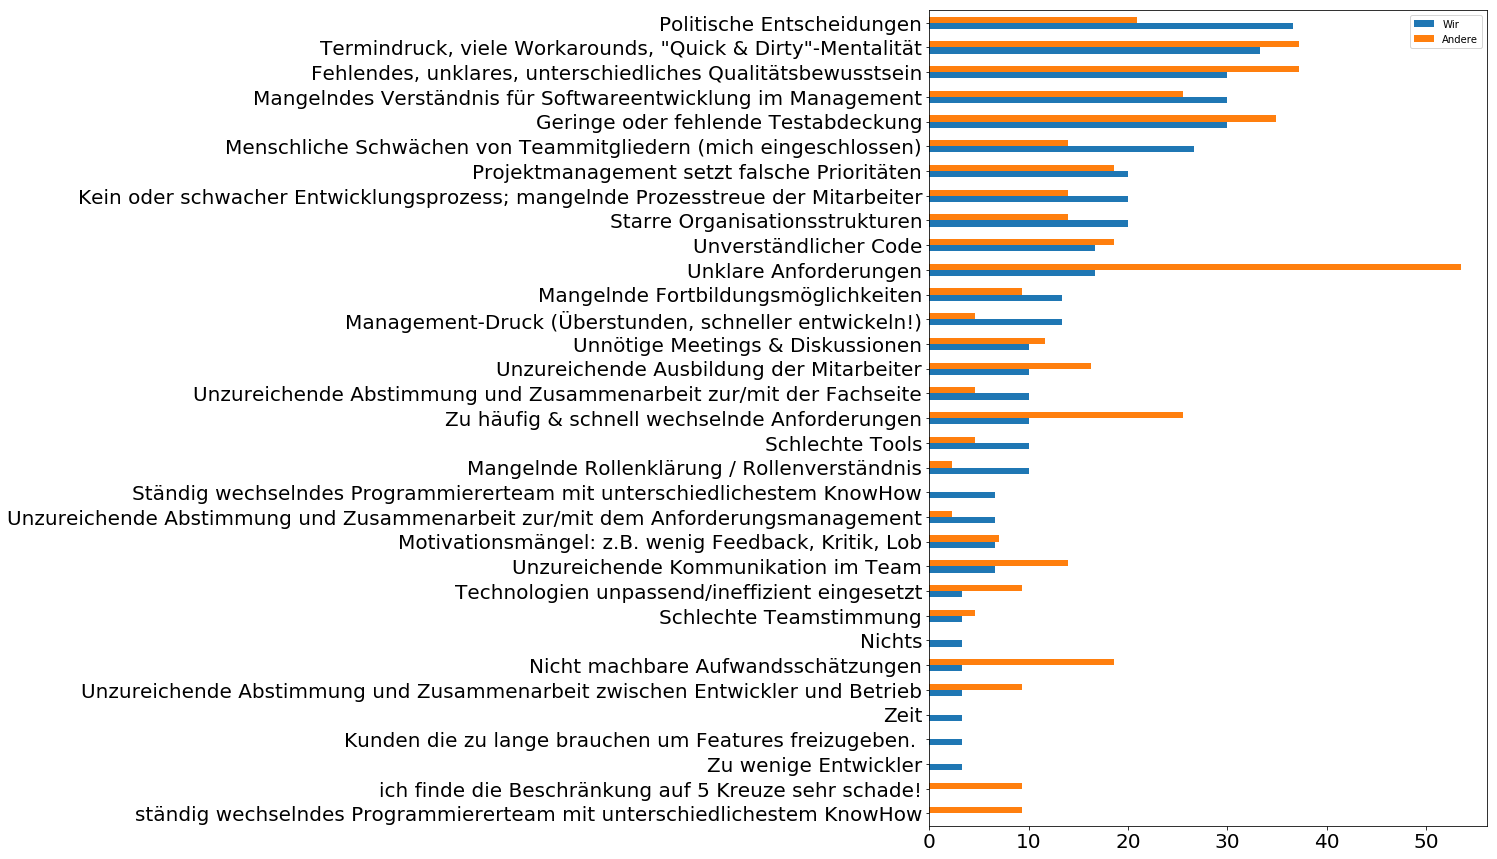

In [11]:
ergebnis_raw.sort_values(by="Wir").plot(kind='barh', figsize=(10,15), fontsize=20)

In [14]:
ergebnis_raw["pseudogesamt"] = (ergebnis_raw['Wir'] + ergebnis_raw["Andere"]) / 2.0
ergebnis_raw = ergebnis_raw.sort_values(by="pseudogesamt", ascending=False)
ergebnis_raw

,Wir,Andere,pseudogesamt
"Termindruck, viele Workarounds, ""Quick & Dirty""-Mentalität",33.333333,37.21,35.271667
Unklare Anforderungen,16.666667,53.49,35.078333
"Fehlendes, unklares, unterschiedliches Qualitätsbewusstsein",30.000000,37.21,33.605000
Geringe oder fehlende Testabdeckung,30.000000,34.88,32.440000
Politische Entscheidungen,36.666667,20.93,28.798333
Mangelndes Verständnis für Softwareentwicklung im Management,30.000000,25.58,27.790000
Menschliche Schwächen von Teammitgliedern (mich eingeschlossen),26.666667,13.95,20.308333
Projektmanagement setzt falsche Prioritäten,20.000000,18.60,19.300000
Zu häufig & schnell wechselnde Anforderungen,10.000000,25.58,17.790000
Unverständlicher Code,16.666667,18.60,17.633333
